# Shopify Internship problem solution

## Created by: Irving Borboa
## Date: September 3, 2020

### This jupyter notebook explains a possible solution to problem set forth by the data science internship application at Shopify.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)
shoe_data = pd.read_csv("/Users/iboa08/Desktop/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv", engine="python") 

### The cell above imports the necessary libraries needed to do an analysis of the data as well as load the data into a pandas dataframe called shoe_data, the cell below just displays information related to the dataframe, this is done to make sure that the dataframe was loaded correctly.

In [27]:
shoe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


In [28]:
shoe_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### The cell above gives me a glimpse as to how the data is stored, and what values each column has, in the cell below I decided to drop some columns that I did not find relevant to the proposed solution and also to make it easier to work with a smaller dataframe.

In [29]:
new_shoe_data = shoe_data

new_shoe_data = new_shoe_data.drop("payment_method", axis=1)
new_shoe_data = new_shoe_data.drop("user_id", axis=1)
new_shoe_data = new_shoe_data.drop("order_id", axis=1)
new_shoe_data = new_shoe_data.drop("created_at", axis=1)

new_shoe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
shop_id         5000 non-null int64
order_amount    5000 non-null int64
total_items     5000 non-null int64
dtypes: int64(3)
memory usage: 117.3 KB


### Like the cells above, this cell gives me a glimpse to the new dataframe I created after dropping some columns from the original dataframe. The new dataframe is called new_shoe_data

In [30]:
new_shoe_data.head()

,shop_id,order_amount,total_items
0,53,224,2
1,92,90,1
2,44,144,1
3,18,156,1
4,18,156,1


### Using the describe() function from pandas, I obtained very important data such as the mean value of each column as well as the maximum and minimum for each, theres also other information however these three are the ones that matter. By focusing on the mean value, one can see that the mean(or average) value of the order amount is the same as the one that was calculated previously. In order to fix that calculation I looked at the maximum value, which represents the highest order amount, of the order_amount column and saw that it was a whopping 704000, to which I instinctly thought that something was wrong, as that is a big amount. My thinking here was that it was that row in particular that was throwing off the calculation, an outlier, so in order to see if there were any more outliers that can throw off our calculation I plotted a boxplot.

In [32]:
new_shoe_data.describe()

,shop_id,order_amount,total_items
count,5000.000000,5000.000000,5000.00000
mean,50.078800,3145.128000,8.78720
std,29.006118,41282.539349,116.32032
min,1.000000,90.000000,1.00000
25%,24.000000,163.000000,1.00000
50%,50.000000,284.000000,2.00000
75%,75.000000,390.000000,3.00000
max,100.000000,704000.000000,2000.00000


### As I thought, there are more outliers that are throwing off the AOV calculation, in this case there are 6 rows from the 5000 that are way above and beyond the rest in terms of order amount, and it is these 6 that are the reason why the AOV was so high in the first place. So in order to better calculate the AOV, I decided to drop these 6 outliers, and then calculate the mean(average) once again.

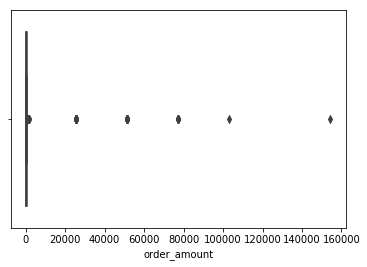

In [42]:
import seaborn as sns
sns.boxplot(x=new_shoe_data['order_amount'])

In [43]:
new_shoe_data = new_shoe_data[new_shoe_data.order_amount < 2000]

### After dropping the outliers, I used the describe() function once again and found a mean value that is more representative of the data. In this case the mean represents the AOV(Average Order Value), which after calculating it again after treating the outliers, comes out to 302.58, which I believe is a more representative value for the AOV.

In [44]:
new_shoe_data.describe()

,shop_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000
mean,49.846465,302.580514,1.994734
std,29.061131,160.804912,0.982821
min,1.000000,90.000000,1.000000
25%,24.000000,163.000000,1.000000
50%,50.000000,284.000000,2.000000
75%,74.000000,387.000000,3.000000
max,100.000000,1760.000000,8.000000


# SQL Answers

## Question 1:

SELECT COUNT(ShipperID)
FROM Orders
WHERE ShipperID ==1;

The number of order shipped by Speedy Express is 54

## Question 2:

### For this question I ran two queries to find out the answer, the last name of the employee with the most orders is Peacock

select EmployeeID, count(*) from Orders
group by EmployeeID

select LastName from Employees where EmployeeID == 4

## Question 3:

### For question three, you have to run a query where you join from multiple tables to get the correct data you need, in this case we needed product name, product id and country, and then count how many of one product there are with the conditional set to equal to Germany. The answer is Boston Crab Meat with 74 orders of that product placed from customers in Germany.

SELECT Orders.OrderId, Orders.CustomerID,Customers.Country,COUNT(OrderDetails.ProductID),Products.ProductName
FROM Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID
INNER JOIN OrderDetails ON Orders.OrderID=OrderDetails.OrderID
INNER JOIN Products ON OrderDetails.ProductID=Products.ProductID
WHERE Country == 'Germany'